In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
us_confirmed = pd.read_csv("US-all/US_confirmed.csv")
us_deaths = pd.read_csv("US-all/US_deaths.csv")
homeless = pd.read_csv("US-all/DHS_Daily_Report.csv")

# us_confirmed = pd.read_csv("data/US_confirmed.csv")
# us_deaths = pd.read_csv("data/US_deaths.csv")
# homeless = pd.read_csv("data/DHS_Daily_Report.csv")

In [3]:
#Checking for null values in dataset

print(us_confirmed.isnull().values.any())
print(us_deaths.isnull().values.any())
print(homeless.isnull().values.any())

False
False
False


In [4]:
#Converting date in homeless dataset to consistent format - yyyy-mm-dd, and sorting it in descending order

homeless['Date of Census'] = pd.to_datetime(homeless['Date of Census'])
homeless.sort_values(by=['Date of Census'], inplace=True, ascending=False)

In [5]:
homeless.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2792,2021-05-10,33430,15504,48934,13565,4361,17926,8920,11728,15504,27232,1795,3776
2791,2021-05-09,33565,15619,49184,13614,4346,17960,8981,11814,15619,27433,1802,3791
2790,2021-05-08,33466,15630,49096,13479,4360,17839,8994,11833,15630,27463,1804,3794
2789,2021-05-07,33511,15606,49117,13490,4377,17867,8999,11844,15606,27450,1807,3800
2788,2021-05-06,33560,15587,49147,13551,4389,17940,8985,11828,15587,27415,1803,3792


In [6]:
def plotGraph(date,data):
    plt.plot(date,data,label="Total Homeless")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.xticks(rotation=30)
    plt.show()

In [7]:
#manupalating the us_death data.

us_deaths_transposed = us_deaths.T
new_header = us_deaths_transposed.iloc[0] #grab the first row for the header
us_deaths_transposed= us_deaths_transposed[1:] #take the data less the header row
us_deaths_transposed.columns = new_header #set the header row as the df header
us_deaths_transposed['total_death'] = us_deaths_transposed.sum(axis =1)
date = us_deaths_transposed.index
us_deaths_transposed['date'] = date
us_deaths_transposed = us_deaths_transposed.set_index('date').diff()
us_deaths_transposed = us_deaths_transposed.reset_index()

In [8]:
#manupalating the us_confirmed cases data.

us_confirmed_transposed = us_confirmed.T
new_header = us_confirmed_transposed.iloc[0] #grab the first row for the header
us_confirmed_transposed= us_confirmed_transposed[1:] #take the data less the header row
us_confirmed_transposed.columns = new_header #set the header row as the df header
us_confirmed_transposed['total_confirmed'] = us_confirmed_transposed.sum(axis =1)
date = us_confirmed_transposed.index
us_confirmed_transposed['date'] = date
us_confirmed_transposed = us_confirmed_transposed.set_index('date').diff()
us_confirmed_transposed = us_confirmed_transposed.reset_index()

## Exploratory Inference 3 - Multi-variate Linear regression

In this inference we are trying to predict the total deaths in the united states with the help of the data for homeless people in the united states.

In [9]:
#function to calculate the parameters and the sse error
def parameter_search(x,y):
    w = np.zeros((np.shape(x)[1],0))
    A = np.dot(x.T,x)
    b = np.dot(x.T,y)
    beta = np.dot(np.linalg.pinv(A),b)
    #beta = np.linalg.solve(A,b)
    return beta

def sse_error(x,y_true,beta):
    y_pred = np.dot(x,beta)
    error = 0
    if len(y_true)!= len(y_pred):
        print("invalid")
        return
    for i in range(len(y_pred)):
        error+= np.power((y_true[i] - y_pred[i]),2)
    return error

In [10]:
#manupulation of all US death data to get the total deaths in the US

us_all_data = us_deaths.T
new_header = us_all_data.iloc[0] #grab the first row for the header
us_all_data = us_all_data[1:] #take the data less the header row
us_all_data.columns = new_header #set the header row as the df header
us_all_data['total_death'] = us_all_data.sum(axis =1)
date = us_all_data.index
us_all_data['date'] = date
us_all_data = us_all_data.set_index('date').diff()
us_all_data = us_all_data.reset_index()
us_all_data = us_all_data[us_all_data['date']>'2020-01-01']
temp1 = us_all_data[['date','total_death']][1:]
temp1['date'] = pd.to_datetime(temp1['date'])

In [11]:
#manupulation of the homeless so as to start is from 1st January 2020 so we can have overlap in out data

homeless['Date of Census'] = pd.DataFrame(pd.to_datetime(homeless['Date of Census']))
homeless = homeless.sort_values(by = 'Date of Census')

small_data = homeless[homeless['Date of Census']>'2020-01-01']
small_data = small_data[small_data['Date of Census']<='2021-04-03']
# temp2 = small_data[['Date of Census', 'Total Individuals in Shelter']]
temp2 = small_data

In [12]:
#Merging both the homeless and the death data

temp = temp1.merge(temp2, how='left', left_on=['date'], right_on=['Date of Census'])
temp = temp.dropna()

In [13]:
# find paramets values for all the features 

x = np.array(temp.drop(['total_death','date','Date of Census'], axis = 1))
y =np.reshape(np.array(temp['total_death']),(-1,1))
beta = parameter_search(x[:400],y[:400])
error = sse_error(x[400:],y[400:],beta)
print("The Error is:", error)
k = temp.drop(['total_death','date','Date of Census'], axis = 1)
for i in range(len(k.columns)):
    print("column name:", k.columns[i], " parameter value:", beta[i])

The Error is: [2.67610599e+08]
column name: Total Adults in Shelter  parameter value: [-9.83937031]
column name: Total Children in Shelter  parameter value: [-2.39324133]
column name: Total Individuals in Shelter  parameter value: [-12.23261684]
column name: Single Adult Men in Shelter  parameter value: [7.00603264]
column name: Single Adult Women in Shelter  parameter value: [8.72519372]
column name: Total Single Adults in Shelter  parameter value: [15.73122654]
column name: Families with Children in Shelter  parameter value: [-4.81610539]
column name: Adults in Families with Children in Shelter  parameter value: [15.64150605]
column name: Children in Families with Children in Shelter  parameter value: [-2.39324133]
column name: Total Individuals in Families with Children in Shelter   parameter value: [13.24826692]
column name: Adult Families in Shelter  parameter value: [137.01682157]
column name: Individuals in Adult Families in Shelter  parameter value: [-41.21210442]


## Observation

From the above we can see that the sum of squared error is too high and we can predict the total deaths based on the homeless people data.

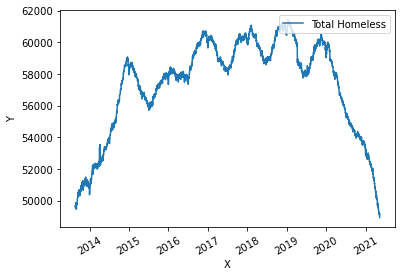

In [14]:
date = homeless['Date of Census']
individualsInShelter = homeless['Total Individuals in Shelter']
plotGraph(date,individualsInShelter)

## Basic Interpretation

From the above plot we can see that the individual in the homeless centers were increasing or remaining the same from year 2014 to start of 2020. But after, the start of the pandemic the people in the shelter are decresing. We can say that one important factor of this could be people fearning to contract covid in these homeless shelter due to the staying with too many people in closed space. So, we can infer that the covid has impacted the number of individual staying in the shelter home.

So, this was something intersting and therefore, we tried another infernce for this.

## Exploratory Inference 4 - Chi-Square test

In this inference, we are checking if the start of covid pandemic had an impact on the homeless people in the shelter. We have chosen 60 days before and after the start of covid in the USA (2020-03-01). From the US-all datasets, we are taking the total covid confirmed cases. From the X (Homeless) dataset, we are taking the total homeless individual in the shelters.

Our null hypothesis is that the underlying distributions both datasets are independent, i.e, the covid did not have an impact on the distributions, and the distribution of US cases is independent of distribution of the number of individuals in the shelter.

We are taking threshold as alpha = 0.05

In [15]:
#homeless dataset split into 60 days before/after the covid pandemic drive of 2020-03-01

homeless_after_covid = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-03-01'))][-70:-10]
homeless_before_covid = homeless[(homeless['Date of Census'].dt.strftime('%Y-%m-%d') <= '2020-03-01')][100:160]

In [16]:
us_confirmed_after_covid = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-03-01'))][100:160]
us_confirmed_before_covid = us_confirmed_transposed[((us_confirmed_transposed['date'] <= '2020-03-01'))][-70:-10]

In [17]:
observed_values = np.zeros([2,2],int)
observed_values[0][0] = us_confirmed_before_covid['total_confirmed'].sum()
observed_values[1][0] = us_confirmed_after_covid['total_confirmed'].sum()
observed_values[0][1] = homeless_before_covid['Total Individuals in Shelter'].sum()
observed_values[1][1] = homeless_after_covid['Total Individuals in Shelter'].sum()

rows = 2
cols = 2

df = (rows-1)*(cols-1)

total_row1,total_row2 = np.sum(observed_values,axis=1)
total_col1,total_col2 = np.sum(observed_values,axis=0)


total = total_row1+total_row2 

#expected values for the chi-squared test
expected_values = np.zeros([2,4])
expected_values[0][0] = (float(total_col1)*total_row1)/(total)
expected_values[1][0] = (float(total_col1)*total_row2)/(total)
expected_values[0][1] = (float(total_col2)*total_row1)/(total)
expected_values[1][1] = (float(total_col2)*total_row2)/(total)

q_expected = 0.0
for i in range(rows):
    for j in range(cols):
        q_expected += ((expected_values[i][j] - observed_values[i][j])**2)/float(expected_values[i][j])
        

#Displaying chi-square table as a dataframe        
df_ar1 = pd.DataFrame()
df_ar1['Date'] = ['Before Covid','After Covid']
df_ar1['Observed_Covid_Cases'] = observed_values[:,0]
df_ar1['Expected_Covid_Cases'] = expected_values[:,0]
df_ar1['Observed_Individual_In_Shelter'] = observed_values[:,1]
df_ar1['Expected_Individual_In_Shelter'] = expected_values[:,1]

df_ar1

,Date,Observed_Covid_Cases,Expected_Covid_Cases,Observed_Individual_In_Shelter,Expected_Individual_In_Shelter
0,Before Covid,13,1.002015e+06,3077201,2.075199e+06
1,After Covid,2954706,1.952704e+06,3042103,4.044105e+06


In [18]:
print("Q_expected : ", q_expected)
print("Degrees of freedom : ",df)

Q_expected :  2248227.447271685
Degrees of freedom :  1


## Observation

Q_expected :  2248227.447271685
Degrees of freedom :  1
We are taking alpha = 0.05 Since Q statistic is 2248227.447271685( really large), with degrees of freedom = 1, we got from the p value calculator that the p-value will be < 0.00001 (really small).

The P-Value is < .00001. The result is significant at alpha < .05.

Hence, we reject the null hypothesis, and the number of covid cases had and impact on the Total number of individual in the shelter distribution of X = Total Individual in Shelters is dependent on the distribution of Y = US all cases. From, the result we can say that due to covid the people in the shelter home have started leaving the shelter home. This may not be the only factor but this is an important factor for people leaving the shelter homes.